# Lab 07

In [39]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from random import sample
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score

In [6]:
let = lambda receiver, block: block(receiver)

In [7]:
datagen = ImageDataGenerator()
generator = datagen.flow_from_directory('../malimg_paper_dataset_imgs', batch_size=20000, target_size=(64,64))

Found 9339 images belonging to 25 classes.


In [8]:
# Make sure al all images included in a single batch
assert len(generator) == 1

Ejemplares por cada familia.

In [9]:
classes = let(generator.class_indices, lambda c: pd.DataFrame.from_dict({'family': list(c.keys()), 'count': list(c.values())}))
classes

,family,count
0,Adialer.C,0
1,Agent.FYI,1
2,Allaple.A,2
3,Allaple.L,3
4,Alueron.gen!J,4
5,Autorun.K,5
6,C2LOP.P,6
7,C2LOP.gen!g,7
8,Dialplatform.B,8
9,Dontovo.A,9


In [10]:
images, labels = generator.next()

Ejemplares del malware

In [11]:
class_labels = list(generator.class_indices.keys())
indices = sample([x for x in range(0, 9339)], 20)

<Figure size 640x480 with 0 Axes>

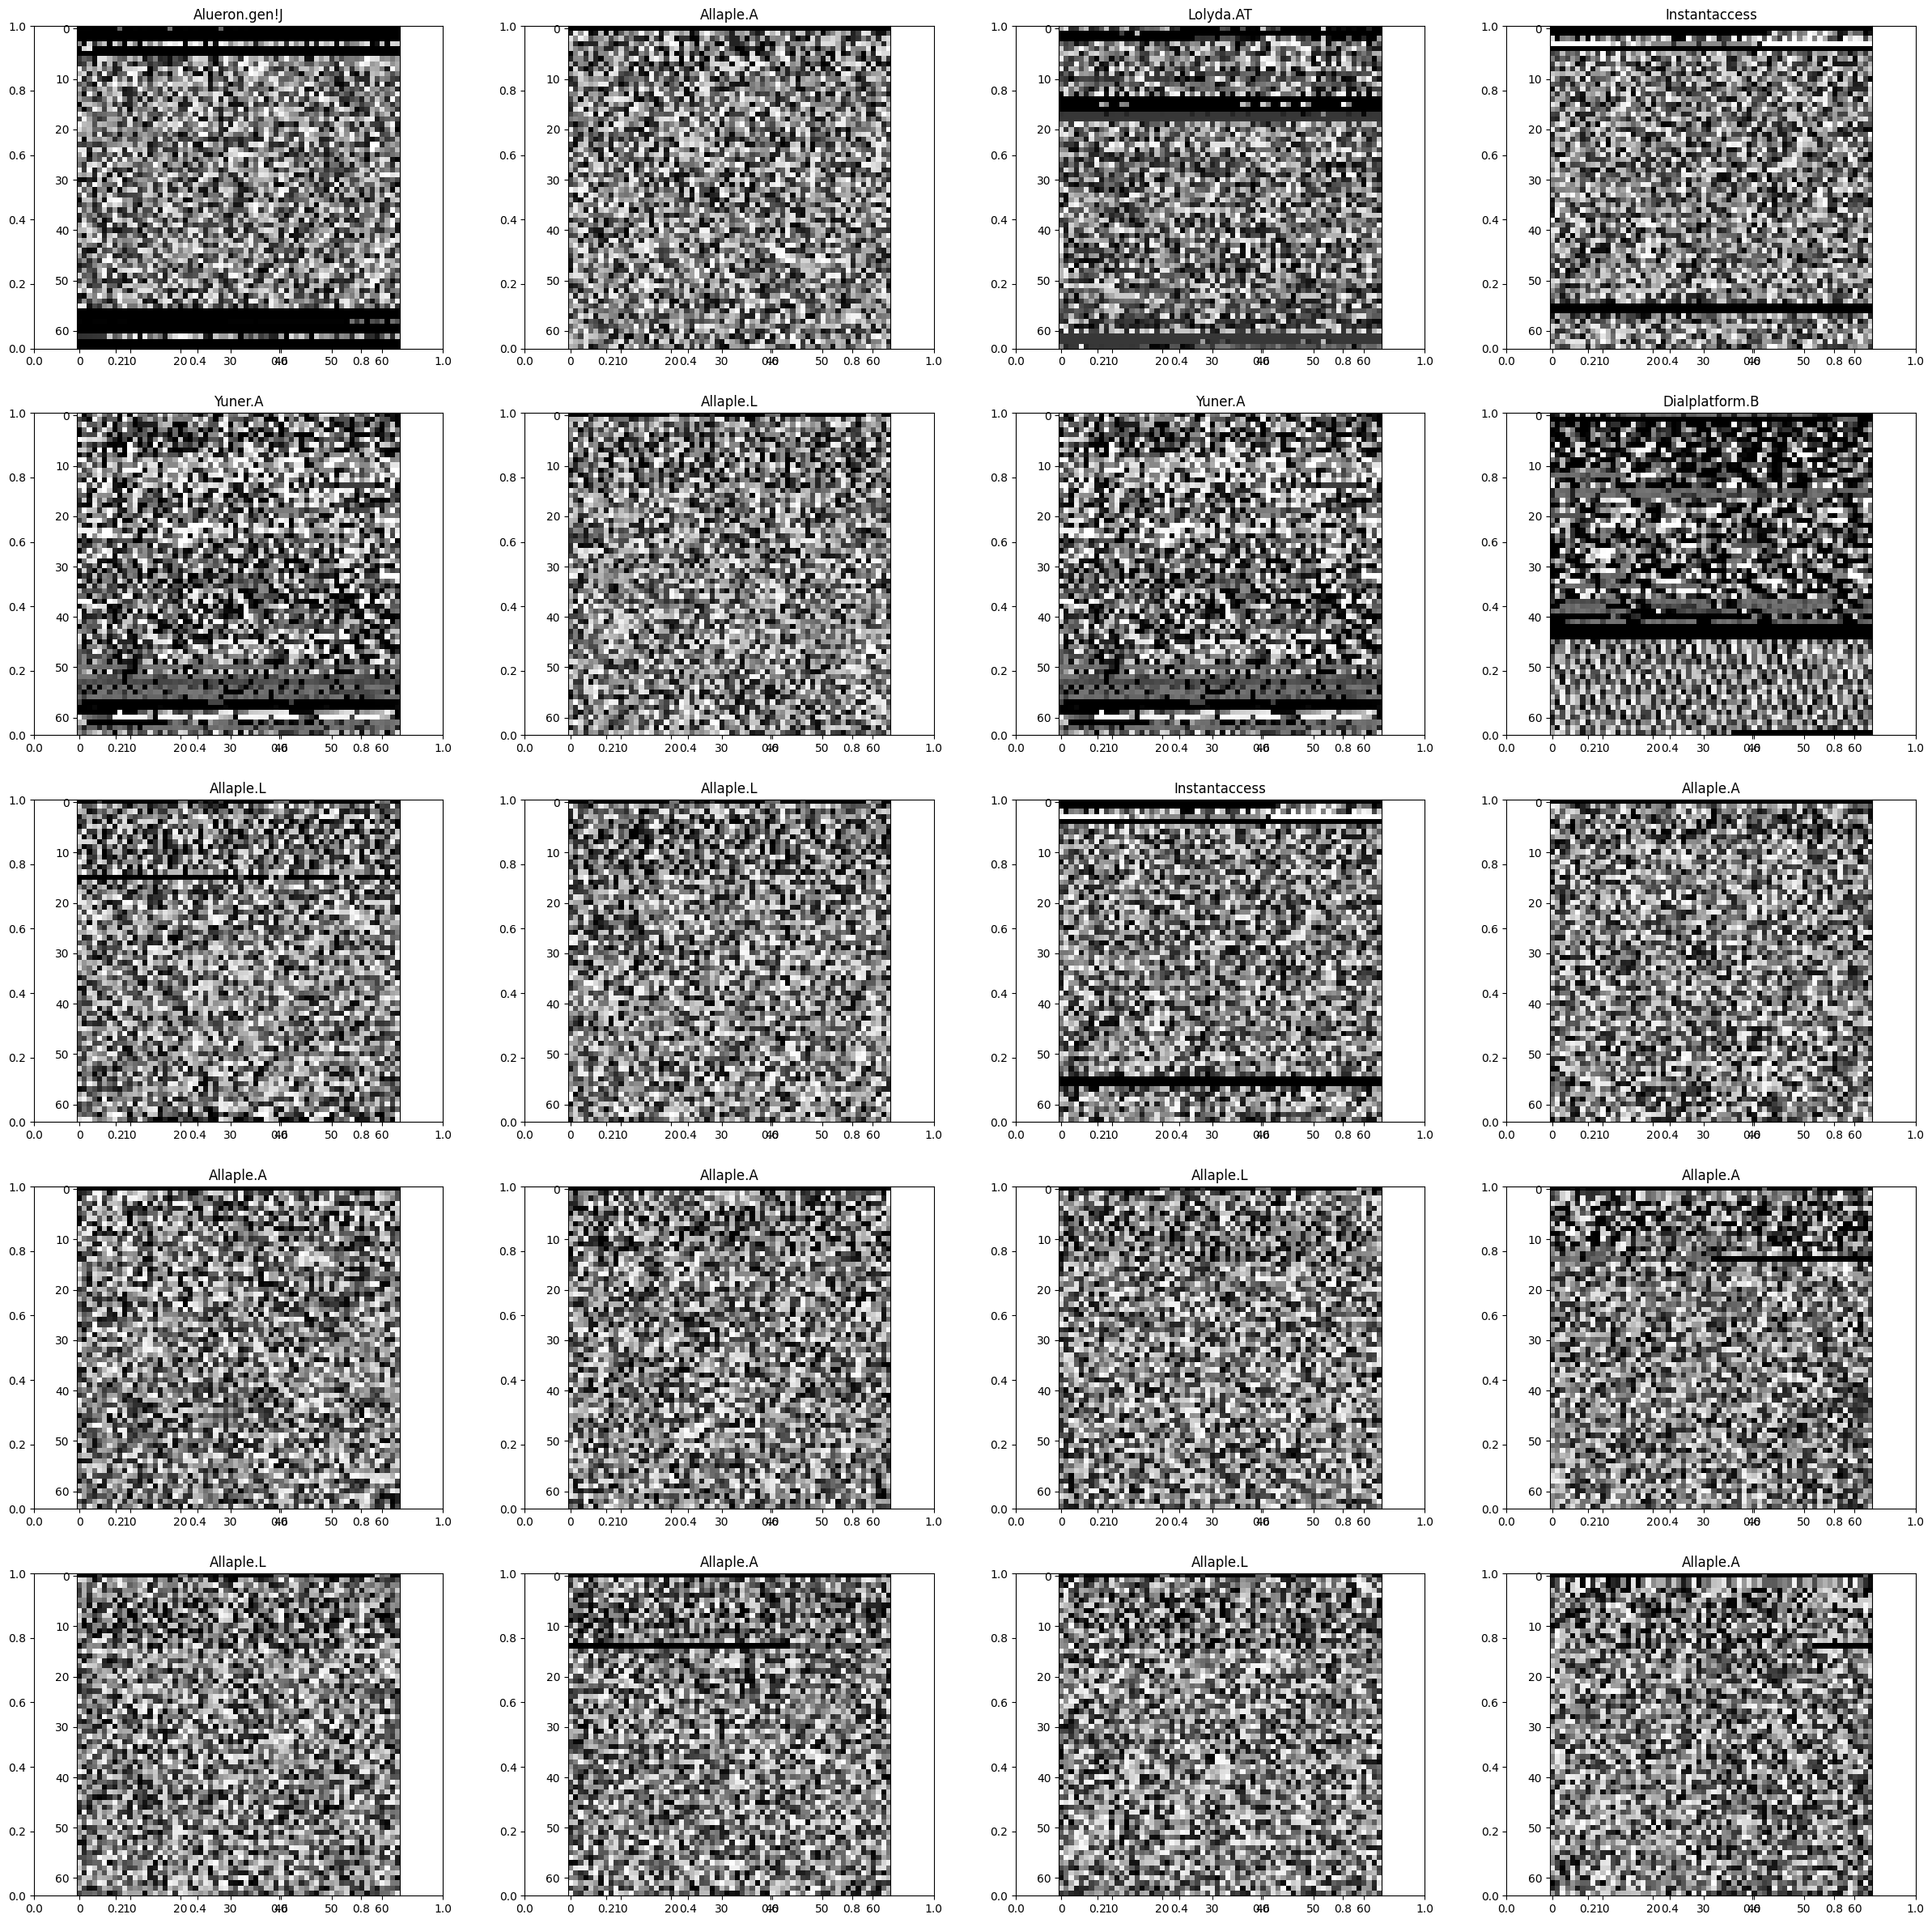

In [12]:
plt.clf()
f, axes = plt.subplots(figsize=(30,30), nrows=5, ncols=4)
for x, i in enumerate(indices):
    p = f.add_subplot(5, 4, x+1)
    p.set_title(class_labels[np.argmax(labels[i])])
    plt.imshow(np.array(images[i]).astype(np.uint8))
plt.show()

Modelo

In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',  input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, 3, padding='same', activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='softmax')
])

In [21]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.build()

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)       

In [23]:
images = images/255. # Nos aseguramos que el rgb este en escala de 0 a 1
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [24]:
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
205/205 [==============================] - 10s 45ms/step - loss: 2.5632 - accuracy: 0.3056 - val_loss: 2.3994 - val_accuracy: 0.3176
Epoch 2/10
205/205 [==============================] - 9s 42ms/step - loss: 1.7543 - accuracy: 0.4507 - val_loss: 0.9493 - val_accuracy: 0.6692
Epoch 3/10
205/205 [==============================] - 9s 45ms/step - loss: 0.8173 - accuracy: 0.7046 - val_loss: 0.6933 - val_accuracy: 0.7288
Epoch 4/10
205/205 [==============================] - 9s 43ms/step - loss: 0.7009 - accuracy: 0.7298 - val_loss: 0.7866 - val_accuracy: 0.6838
Epoch 5/10
205/205 [==============================] - 9s 46ms/step - loss: 0.5333 - accuracy: 0.7829 - val_loss: 0.4814 - val_accuracy: 0.8251
Epoch 6/10
205/205 [==============================] - 14s 70ms/step - loss: 0.4581 - accuracy: 0.8178 - val_loss: 0.4390 - val_accuracy: 0.8476
Epoch 7/10
205/205 [==============================] - 9s 46ms/step - loss: 0.3808 - accuracy: 0.8564 - val_loss: 0.4128 - val_accuracy: 0.84

In [18]:
s = model.evaluate(X_test, y_test)

88/88 [==============================] - 1s 11ms/step - loss: 0.1360 - accuracy: 0.9532


In [33]:
y_pred = model.predict(X_test)
cfm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

88/88 [==============================] - 1s 13ms/step


<Figure size 640x480 with 0 Axes>

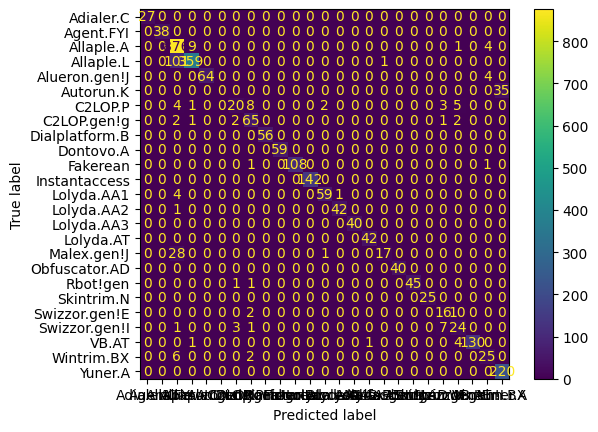

In [38]:
plt.clf()
ConfusionMatrixDisplay(cfm, display_labels=class_labels).plot()
plt.show()

In [44]:
recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

0.9061384725196289

In [45]:
f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

0.8973539051297186

En lineas generales se clasifico de correctamente, con presicion de ~95%. El Dataset esta desbalanceado y no se tomo ninguna medidad para balancear los datos, a pesar de esto el recall se mantiene en niveles aceptables